<a href="https://colab.research.google.com/github/Hanzlah10/CFA/blob/main/CFA_Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

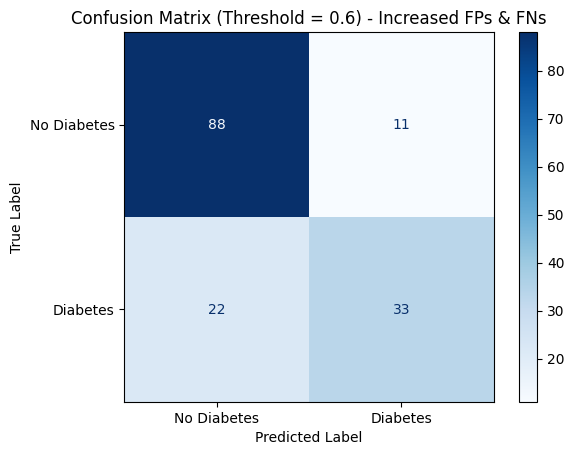

Custom Threshold (0.6) Accuracy: 0.79
Number of False Positives (FP): 11
Number of False Negatives (FN): 22
False Positive Rate (FPR): 11.11% of actual negatives
False Negative Rate (FNR): 40.00% of actual positives


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Split the data into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Get predicted probabilities
y_probs = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1 (Diabetes Positive)

# Set lower threshold to increase False Positives (FPs)
threshold = 0.6 # Lower threshold classifies more cases as positive, increasing FPs

# Make predictions based on the new threshold
y_pred_custom = (y_probs >= threshold).astype(int)


# Compute confusion matrix
custom_cm = confusion_matrix(y_test, y_pred_custom)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=custom_cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (Threshold = {threshold}) - Increased FPs & FNs')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate accuracy
custom_acc = accuracy_score(y_test, y_pred_custom)
print(f'Custom Threshold ({threshold}) Accuracy: {custom_acc:.2f}')

# Extract FP and FN counts
fp = custom_cm[0][1]  # False Positives: Actual No Diabetes but predicted as Diabetes
fn = custom_cm[1][0]  # False Negatives: Actual Diabetes but predicted as No Diabetes

# Compute total actual negatives (TN + FP) and total actual positives (TP + FN)
total_actual_negatives = custom_cm[0][0] + custom_cm[0][1]  # TN + FP
total_actual_positives = custom_cm[1][0] + custom_cm[1][1]  # FN + TP

# Compute FP and FN percentages
fp_percentage = (fp / total_actual_negatives) * 100 if total_actual_negatives > 0 else 0
fn_percentage = (fn / total_actual_positives) * 100 if total_actual_positives > 0 else 0

# Print results
print(f'Number of False Positives (FP): {fp}')
print(f'Number of False Negatives (FN): {fn}')
print(f'False Positive Rate (FPR): {fp_percentage:.2f}% of actual negatives')
print(f'False Negative Rate (FNR): {fn_percentage:.2f}% of actual positives')


1. Analyzing Original Data Distribution


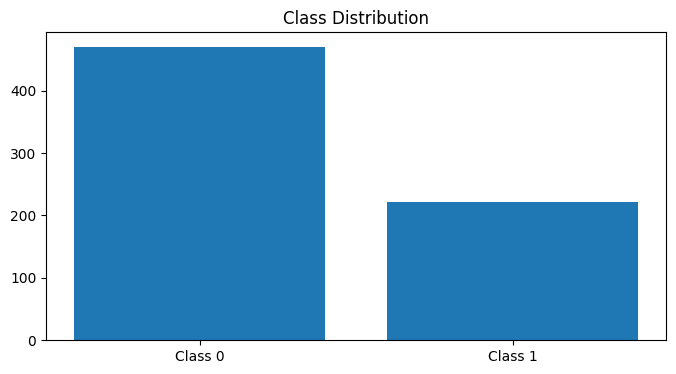

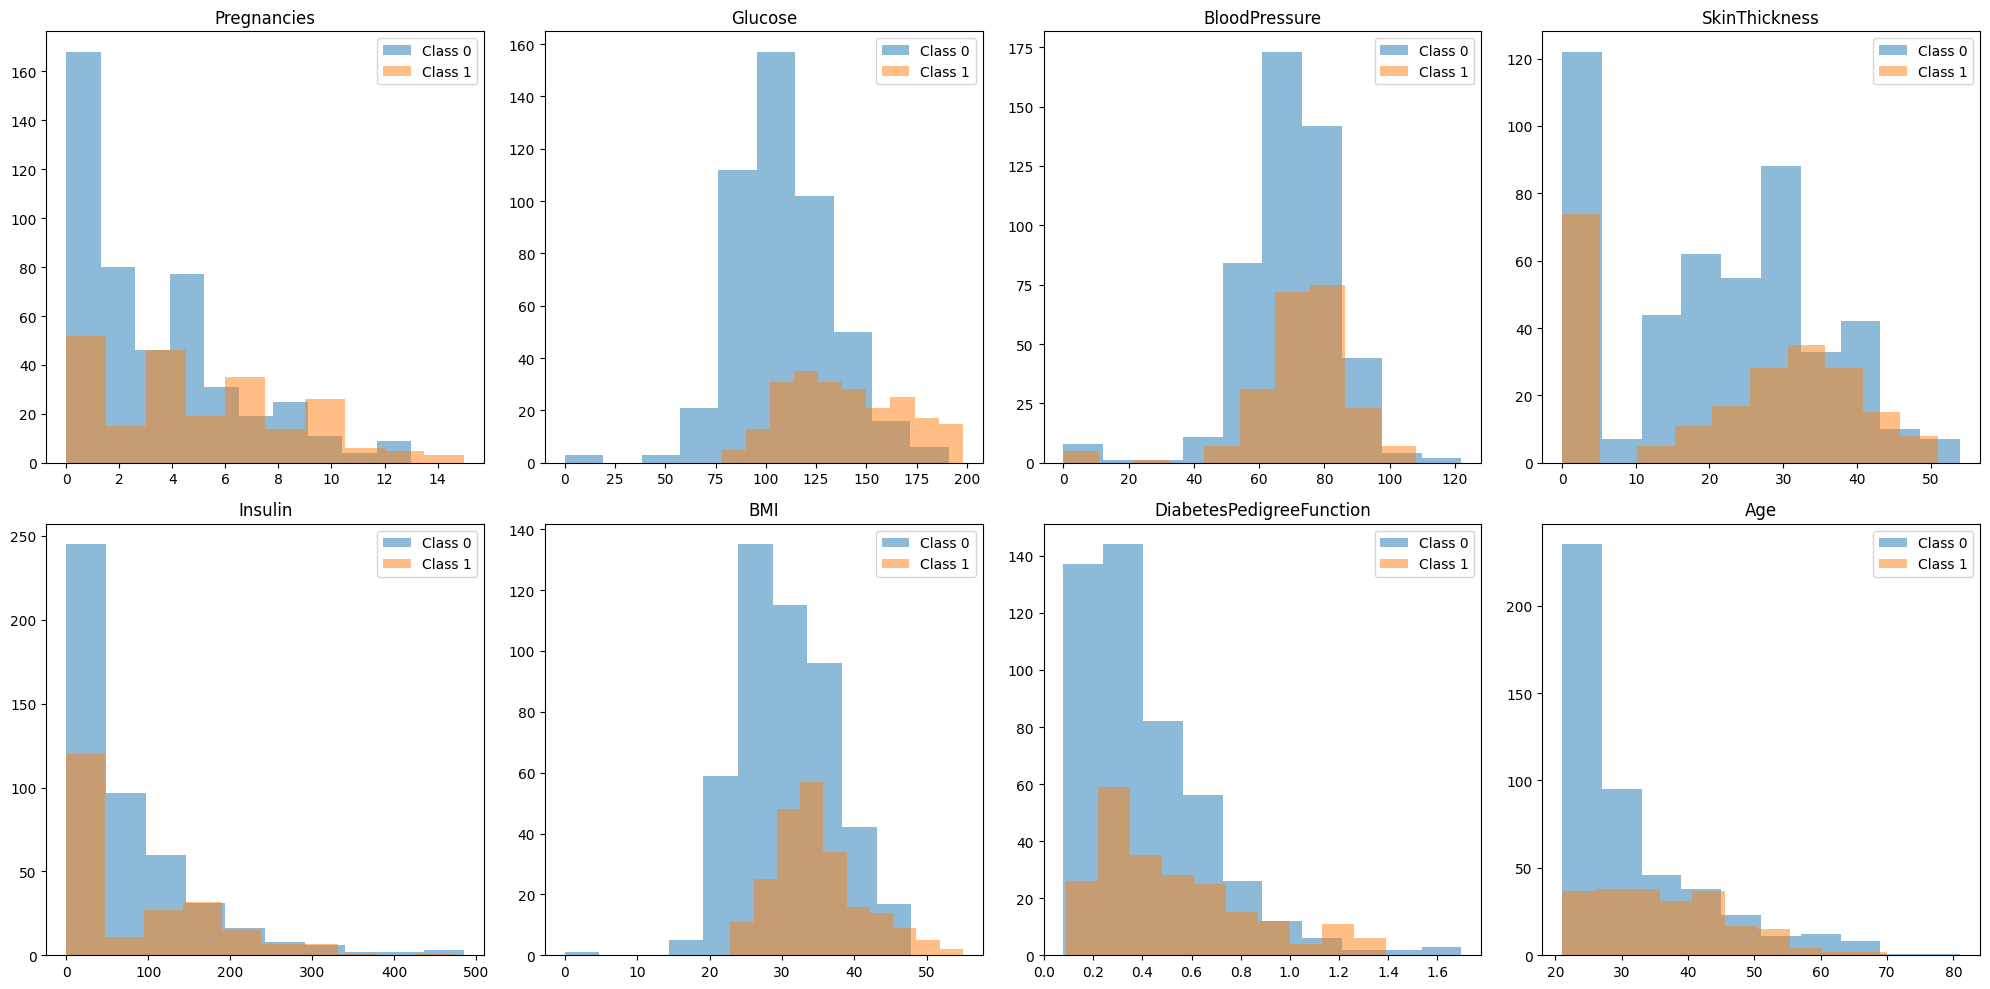


2. Selecting Important Features


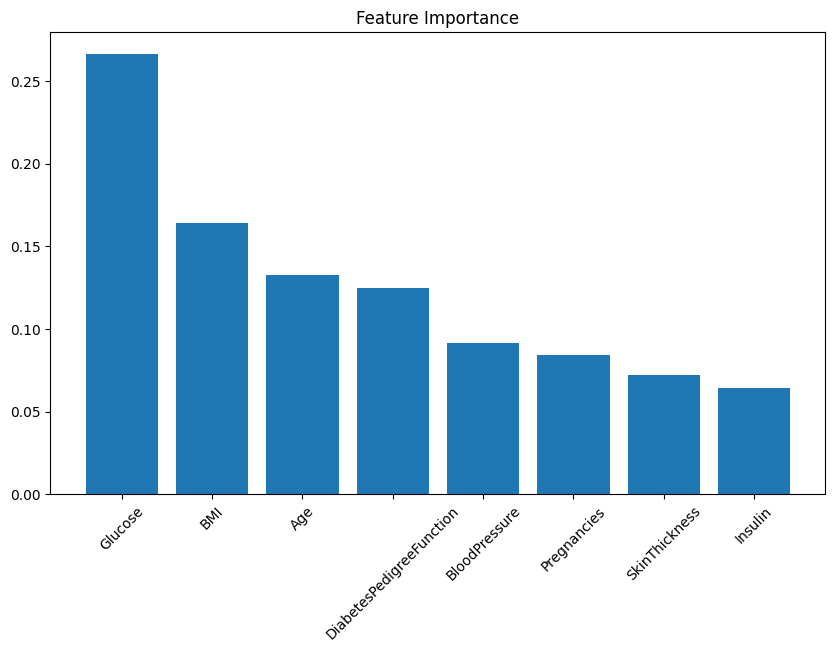


Feature Importance Scores:
Glucose: 0.2663
BMI: 0.1640
Age: 0.1326
DiabetesPedigreeFunction: 0.1248
BloodPressure: 0.0914
Pregnancies: 0.0843
SkinThickness: 0.0721
Insulin: 0.0644

Tolerance levels for important features:
Glucose: 5.9246
BMI: 1.3126
Age: 2.1888
DiabetesPedigreeFunction: 0.0568
BloodPressure: 3.0623
Pregnancies: 0.6504
SkinThickness: 3.0396
Insulin: 18.0565

Class distribution:
Majority class: 470
Minority class: 221

Generated 121 synthetic instances

3. Visualizing Results
Principal Component 1:
  SkinThickness: 0.5629
  Insulin: 0.5430
  BMI: 0.3572
  Age: -0.3117
  Pregnancies: -0.2911
  DiabetesPedigreeFunction: 0.2389
  Glucose: 0.1378
  BloodPressure: 0.0530
Principal Component 2:
  Age: 0.5441
  Pregnancies: 0.4782
  BloodPressure: 0.4498
  Glucose: 0.3994
  BMI: 0.2904
  DiabetesPedigreeFunction: 0.1145
  SkinThickness: 0.0933
  Insulin: 0.0854


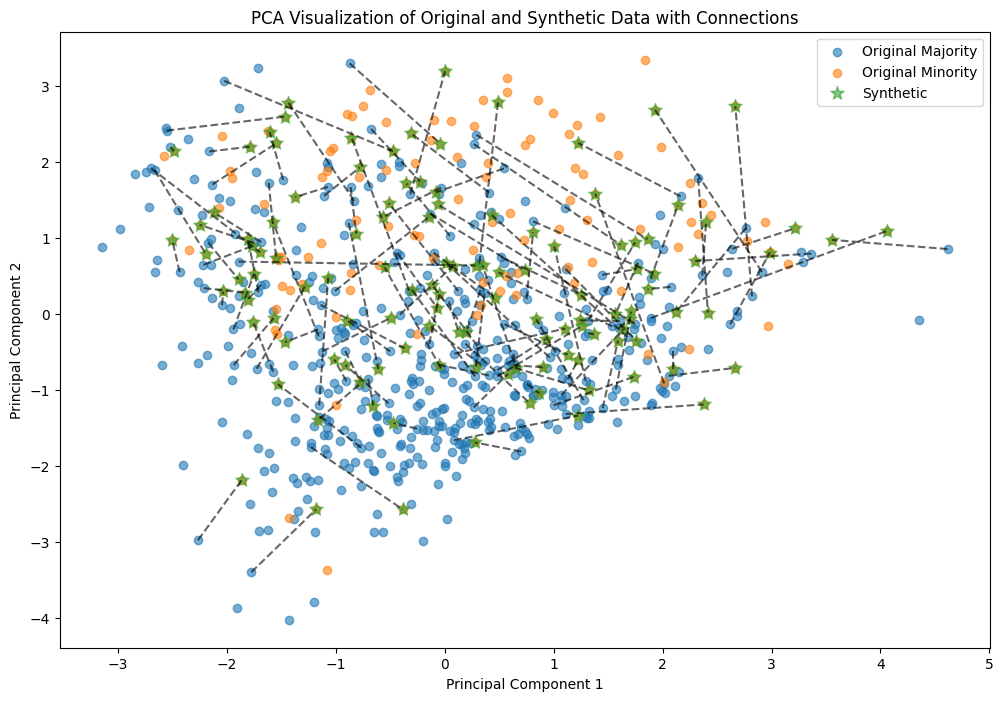


Table with 20 examples of synthetic data and changes made:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           6.0    148.0           72.0           35.0      0.0  33.6   
1           8.0    183.0           64.0            0.0      0.0  23.3   
2           3.0     78.0           50.0           32.0     88.0  31.0   
3           5.0    166.0           72.0           19.0    175.0  25.8   
4           7.0    100.0            0.0            0.0      0.0  30.0   
5           7.0    107.0           74.0            0.0      0.0  29.6   
6           1.0    115.0           70.0           30.0     96.0  34.6   
7           9.0    119.0           80.0           35.0      0.0  29.0   
8          11.0    143.0           94.0           33.0    146.0  36.6   
9          10.0    125.0           70.0           26.0    115.0  31.1   
10          7.0    147.0           76.0            0.0      0.0  39.4   
11          3.0    158.0           76.0           36.0    245.0 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import shap
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def analyze_data_distribution(X, y, feature_names):
    """Show class distribution and feature importance"""
    # Class distribution
    plt.figure(figsize=(8, 4))
    unique, counts = np.unique(y, return_counts=True)
    plt.bar(['Class ' + str(i) for i in unique], counts)
    plt.title('Class Distribution')
    plt.show()

    # Feature distributions
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    for i, (ax, name) in enumerate(zip(axes.ravel(), feature_names)):
        for label in [0, 1]:
            ax.hist(X[y == label, i], alpha=0.5, label=f'Class {label}')
        ax.set_title(name)
        ax.legend()
    plt.tight_layout()
    plt.show()

def get_important_features(X, y, feature_names):
    """Get feature importance using Random Forest"""
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)

    # Plot feature importance
    importance = rf.feature_importances_
    indices = np.argsort(importance)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title('Feature Importance')
    plt.bar(range(X.shape[1]), importance[indices])
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
    plt.show()

    # Print importance scores
    print("\nFeature Importance Scores:")
    for idx in indices:
        print(f"{feature_names[idx]}: {importance[idx]:.4f}")

    return indices[importance[indices] > 0.05]

def visualize_results_with_connections(X_original, X_synthetic, y_original, feature_names, used_indices):
    """Visualize original and synthetic data using PCA and show connections"""
    # Combine all data
    X_combined = np.vstack([X_original, X_synthetic])

    # Apply PCA
    scaler = StandardScaler()
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(scaler.fit_transform(X_combined))

    # Split back into original and synthetic
    X_pca_orig = X_pca[:len(X_original)]
    X_pca_synt = X_pca[len(X_original):]

    # Print feature contributions for the first two principal components
    for i, component in enumerate(pca.components_[:2], start=1):
        sorted_indices = np.argsort(np.abs(component))[::-1]
        sorted_features = [(feature_names[idx], component[idx]) for idx in sorted_indices]
        print(f"Principal Component {i}:")
        for feature, contribution in sorted_features:
            print(f"  {feature}: {contribution:.4f}")

    # Plot original and synthetic points
    plt.figure(figsize=(12, 8))
    plt.scatter(X_pca_orig[y_original == 0, 0], X_pca_orig[y_original == 0, 1],
                label='Original Majority', alpha=0.6)
    plt.scatter(X_pca_orig[y_original == 1, 0], X_pca_orig[y_original == 1, 1],
                label='Original Minority', alpha=0.6)
    plt.scatter(X_pca_synt[:, 0], X_pca_synt[:, 1],
                label='Synthetic', marker='*', s=100, alpha=0.6)

    # Draw lines connecting original majority points to their synthetic counterparts
    majority_indices = np.where(y_original == 0)[0]
    for syn_idx, maj_idx in enumerate(used_indices):
        plt.plot([X_pca_orig[majority_indices[maj_idx], 0], X_pca_synt[syn_idx, 0]],
                 [X_pca_orig[majority_indices[maj_idx], 1], X_pca_synt[syn_idx, 1]], 'k--', alpha=0.6)

    plt.legend()
    plt.title('PCA Visualization of Original and Synthetic Data with Connections')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

def generate_counterfactuals(X, y, feature_names, fd=2, tol=0.2):
    """Main CFA function"""
    print("1. Analyzing Original Data Distribution")
    analyze_data_distribution(X, y, feature_names)

    print("\n2. Selecting Important Features")
    important_features = get_important_features(X, y, feature_names)
    X_important = X[:, important_features]

    # Calculate tolerance
    tolerance = tol * np.std(X_important, axis=0)
    print("\nTolerance levels for important features:")
    for i, feat_idx in enumerate(important_features):
        print(f"{feature_names[feat_idx]}: {tolerance[i]:.4f}")

    # Separate classes
    majority_mask = y == 0
    majority_data = X_important[majority_mask]
    minority_data = X_important[~majority_mask]

    majority_indices = np.where(majority_mask)[0]
    print(f"\nClass distribution:")
    print(f"Majority class: {len(majority_data)}")
    print(f"Minority class: {len(minority_data)}")

    # Generate synthetic instances
    synthetic_instances = []
    used_indices = []
    majority_indices_used = []

    # Find pairs using nearest neighbors
    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(majority_data)

    for min_instance in minority_data:
        dist, maj_idx = nn.kneighbors([min_instance])
        maj_idx = maj_idx[0][0]

        if maj_idx not in used_indices:
            diff = np.abs(min_instance - majority_data[maj_idx])
            if np.sum(diff <= tolerance) >= fd:
                synthetic = majority_data[maj_idx] + (min_instance - majority_data[maj_idx])
                synthetic_instances.append(synthetic)
                used_indices.append(maj_idx)
                majority_indices_used.append(majority_indices[maj_idx])

    if not synthetic_instances:
        print("\nNo synthetic instances generated. Try adjusting parameters.")
        return X, y, None

    synthetic_instances = np.array(synthetic_instances)

    # Create full synthetic instances
    full_synthetic = np.zeros((len(synthetic_instances), X.shape[1]))
    for i, maj_idx in enumerate(used_indices):
        full_synthetic[i] = X[majority_indices[maj_idx]]
        full_synthetic[i, important_features] = synthetic_instances[i]

    print(f"\nGenerated {len(synthetic_instances)} synthetic instances")

    # Visualize results
    print("\n3. Visualizing Results")
    visualize_results_with_connections(X, full_synthetic, y, feature_names, used_indices)

    # Create a table with 20 examples of synthetic data
    synthetic_data_table = pd.DataFrame(full_synthetic[:20], columns=feature_names)
    majority_data_table = pd.DataFrame(X[majority_indices_used[:20]], columns=feature_names)

    differences = synthetic_data_table - majority_data_table
    differences.columns = [col + '_change' for col in differences.columns]

    table_with_changes = pd.concat([synthetic_data_table, differences], axis=1)

    print("\nTable with 20 examples of synthetic data and changes made:")
    print(table_with_changes)

    # **Save augmented data to CSV**
    augmented_data = pd.DataFrame(full_synthetic, columns=feature_names)
    augmented_data['Outcome'] = 1  # Label synthetic data as minority class
    augmented_data.to_csv('augmented_data.csv', index=False)
    print("\nAugmented data saved to 'augmented_data.csv'")

    # Return augmented dataset
    X_augmented = np.vstack([X, full_synthetic])
    y_augmented = np.concatenate([y, np.ones(len(full_synthetic))])
    synthetic_labels = np.concatenate([np.zeros(len(X)), np.ones(len(full_synthetic))])

    return X_augmented, y_augmented, synthetic_labels


def remove_outliers(X, y):
    """Remove outliers using Isolation Forest"""
    # Fit the Isolation Forest model
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    yhat = iso_forest.fit_predict(X)

    # Select all rows that are not outliers
    mask = yhat != -1
    return X[mask], y[mask]

def explain_with_shap(X, model, feature_names):
    """Use SHAP to explain model predictions"""
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)

    if isinstance(shap_values, list):
        shap_values_class_1 = shap_values[1]
    else:
        shap_values_class_1 = shap_values

    shap.summary_plot(shap_values_class_1, X, feature_names=np.array(feature_names))

    shap.initjs()
    shap.force_plot(shap_values_class_1[0], X[0], feature_names=feature_names)

def run_example_with_shap_updated():
    # Load data
    url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
    columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

    data = pd.read_csv(url, names=columns)
    # data = data.sample(n=200, random_state=42)

    # Separate features and target
    X = data.drop('Outcome', axis=1).values
    y = data['Outcome'].values
    feature_names = list(data.drop('Outcome', axis=1).columns)

    # Remove outliers
    X, y = remove_outliers(X, y)

    # Fit Random Forest model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)

    # Explain using SHAP
    # print("Explaining using SHAP:")
    # explain_with_shap(X, rf, feature_names)

    # Run CFA (Counterfactual Augmentation)
    X_augmented, y_augmented, synthetic_labels = generate_counterfactuals(
        X, y, feature_names, fd=2, tol=0.2
    )

    print("\nFinal Results:")
    print("-" * 69)
    print(f"Original dataset shape (after outlier removal): {X.shape}")
    print(f"Augmented dataset shape: {X_augmented.shape}")
    print(f"Number of synthetic instances: {np.sum(synthetic_labels)}")

    # **Optionally, save the full augmented dataset**
    full_data = pd.DataFrame(X_augmented, columns=feature_names)
    full_data['Outcome'] = y_augmented
    full_data.to_csv('full_augmented_dataset.csv', index=False)
    print("\nFull augmented dataset saved to 'full_augmented_dataset.csv'")

# Run the updated example
run_example_with_shap_updated()


(812, 9)
Logistic Regression Accuracy: 0.78


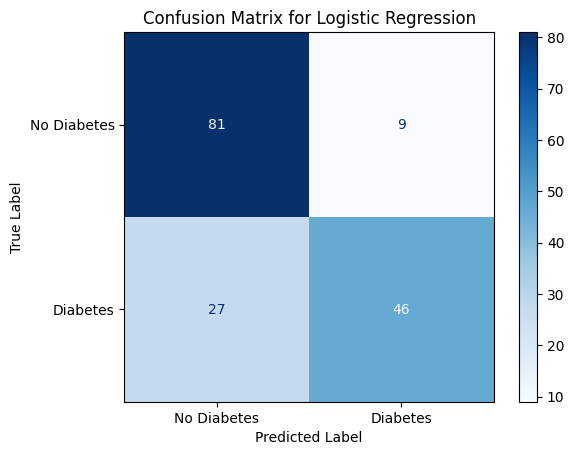

Number of False Positives (FP): 9
Number of False Negatives (FN): 27
False Positive Rate (FPR): 10.00% of actual negatives
False Negative Rate (FNR): 36.99% of actual positives


In [36]:
import pandas as pd

# Load augmented dataset
url = '/content/full_augmented_dataset.csv'
data = pd.read_csv(url)

print(data.shape)
# print(data.head())

# Basic statistics
# print(data.describe())

# Check for missing values
# print(data.isnull().sum())

# Visualize data distributions
import seaborn as sns
import matplotlib.pyplot as plt

# # Histograms
# data.hist(bins=50, figsize=(20, 15))
# plt.show()

# # Correlation matrix
# corr_matrix = data.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.show()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Split the data into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)

# Accuracy
log_reg_acc = accuracy_score(y_test, log_reg_pred)
print(f'Logistic Regression Accuracy: {log_reg_acc:.2f}')

# Confusion Matrix
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=log_reg_cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Extract FP and FN counts
fp = log_reg_cm[0][1]  # False Positives: Actual No Diabetes but predicted as Diabetes
fn = log_reg_cm[1][0]  # False Negatives: Actual Diabetes but predicted as No Diabetes

# Compute total actual negatives (TN + FP) and total actual positives (TP + FN)
total_actual_negatives = log_reg_cm[0][0] + log_reg_cm[0][1]  # TN + FP
total_actual_positives = log_reg_cm[1][0] + log_reg_cm[1][1]  # FN + TP

# Compute FP and FN percentages
fp_percentage = (fp / total_actual_negatives) * 100 if total_actual_negatives > 0 else 0
fn_percentage = (fn / total_actual_positives) * 100 if total_actual_positives > 0 else 0

# Print results
print(f'Number of False Positives (FP): {fp}')
print(f'Number of False Negatives (FN): {fn}')
print(f'False Positive Rate (FPR): {fp_percentage:.2f}% of actual negatives')
print(f'False Negative Rate (FNR): {fn_percentage:.2f}% of actual positives')




1. Analyzing Original Data Distribution


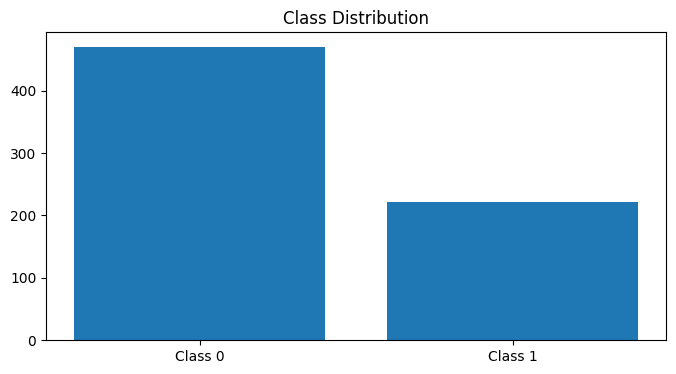

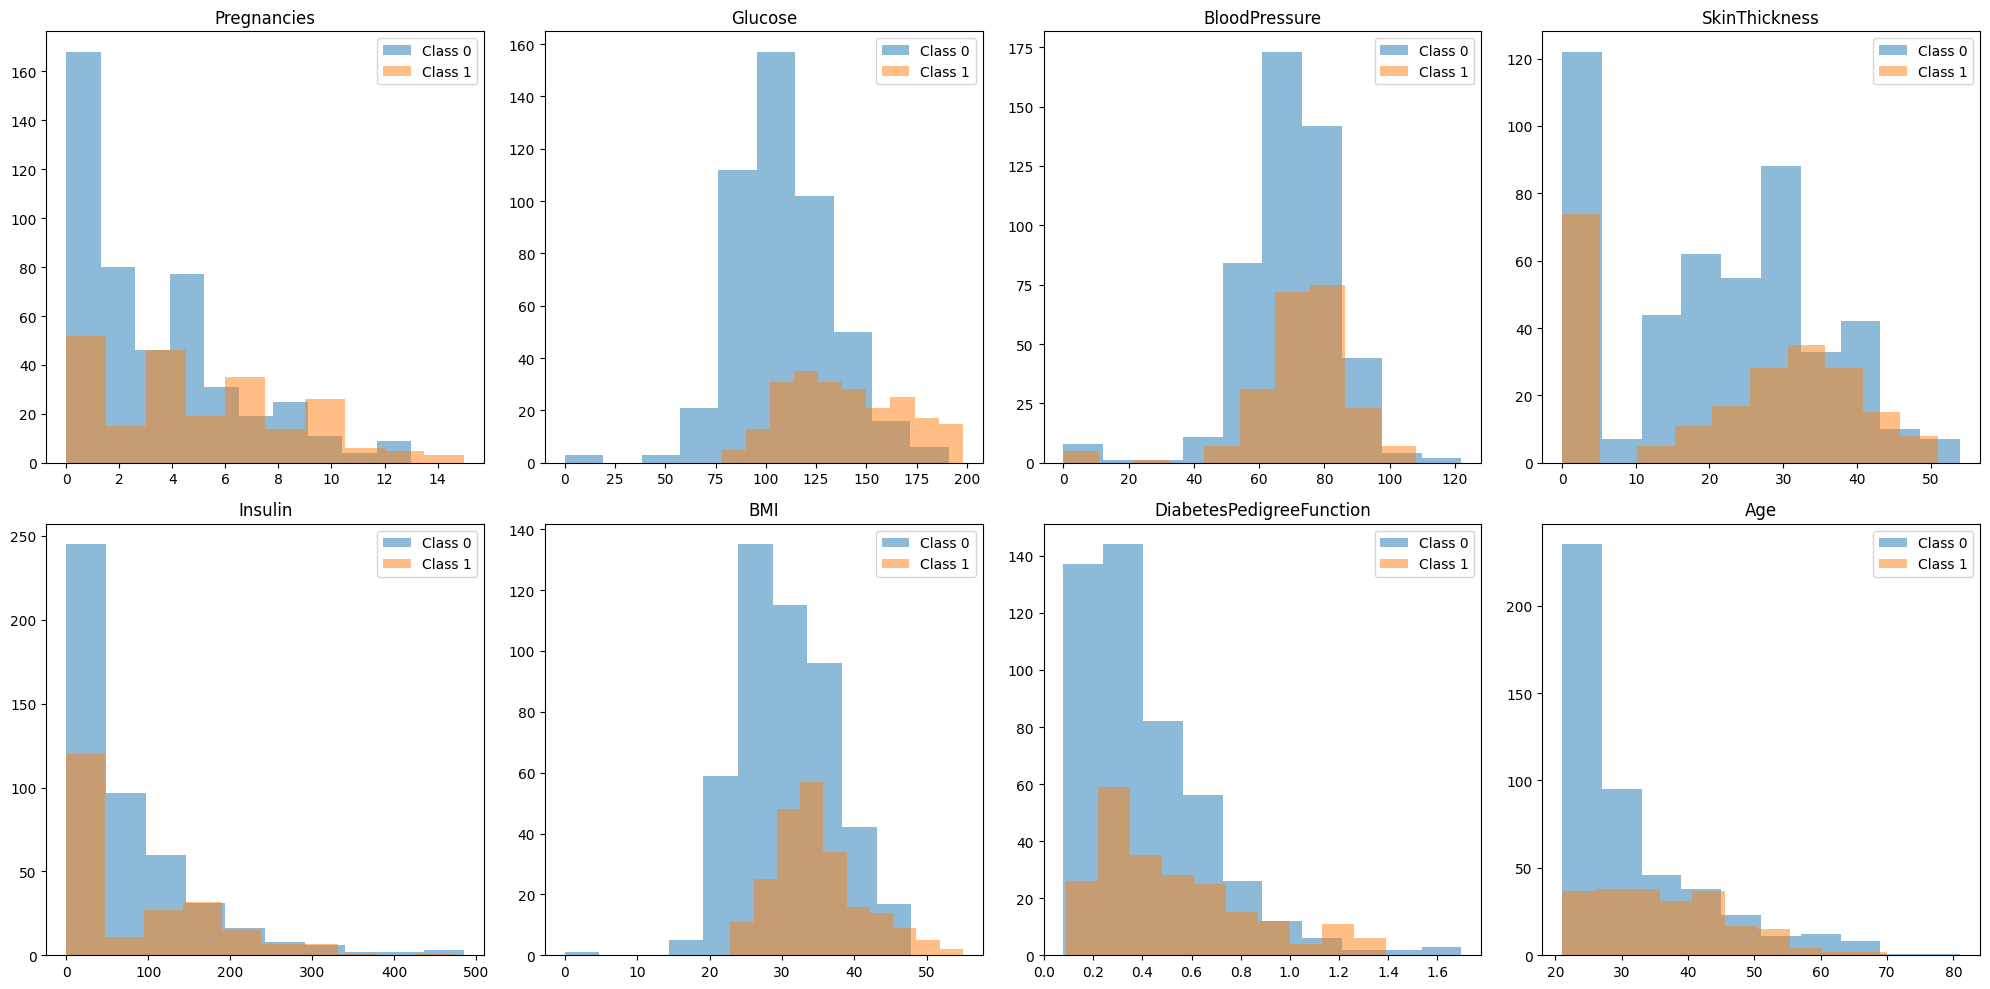


2. Selecting Important Features


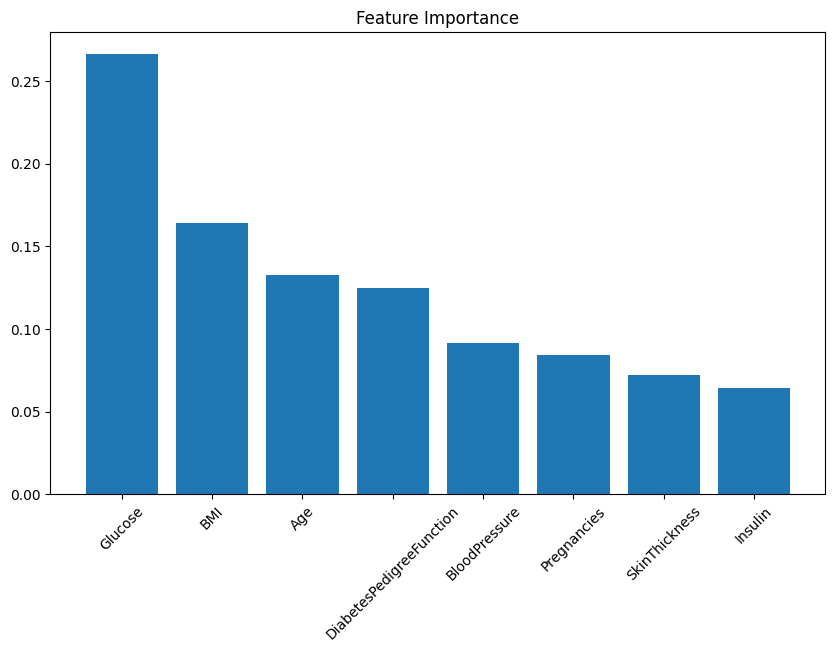


Feature Importance Scores:
Glucose: 0.2663
BMI: 0.1640
Age: 0.1326
DiabetesPedigreeFunction: 0.1248
BloodPressure: 0.0914
Pregnancies: 0.0843
SkinThickness: 0.0721
Insulin: 0.0644

Tolerance levels for important features:
Glucose: 5.9246
BMI: 1.3126
Age: 2.1888
DiabetesPedigreeFunction: 0.0568
BloodPressure: 3.0623
Pregnancies: 0.6504
SkinThickness: 3.0396
Insulin: 18.0565

Class distribution:
Majority class: 470
Minority class: 221

Generated 121 synthetic instances

3. Visualizing Results
Principal Component 1:
  SkinThickness: 0.5629
  Insulin: 0.5430
  BMI: 0.3572
  Age: -0.3117
  Pregnancies: -0.2911
  DiabetesPedigreeFunction: 0.2389
  Glucose: 0.1378
  BloodPressure: 0.0530
Principal Component 2:
  Age: 0.5441
  Pregnancies: 0.4782
  BloodPressure: 0.4498
  Glucose: 0.3994
  BMI: 0.2904
  DiabetesPedigreeFunction: 0.1145
  SkinThickness: 0.0933
  Insulin: 0.0854


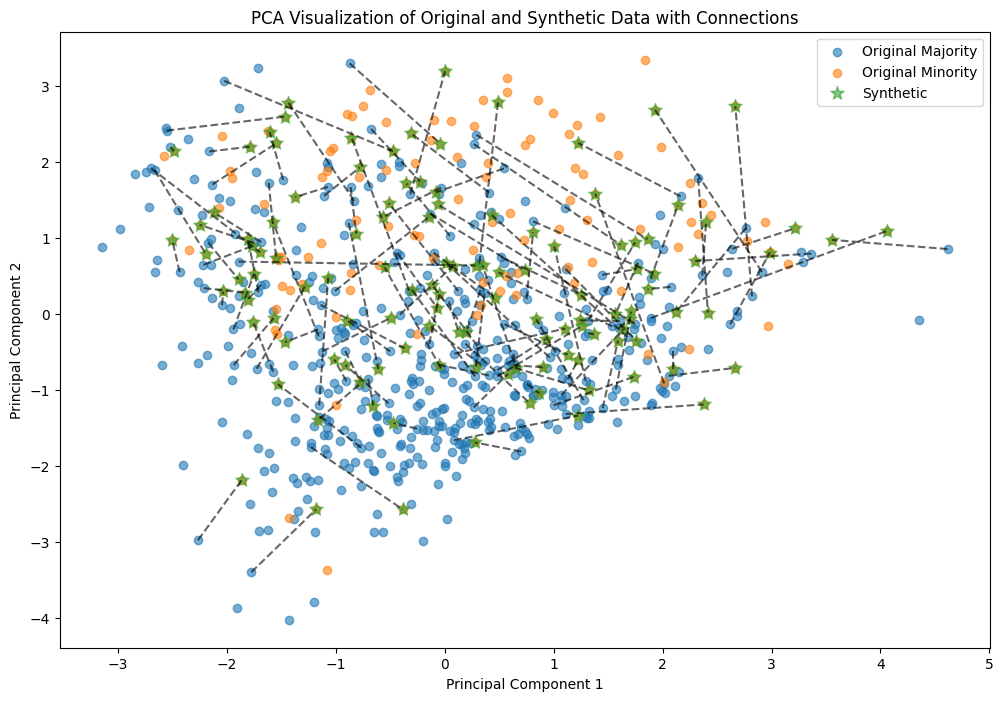


Table with 20 examples of synthetic data and changes made:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           6.0    148.0           72.0           35.0      0.0  33.6   
1           8.0    183.0           64.0            0.0      0.0  23.3   
2           3.0     78.0           50.0           32.0     88.0  31.0   
3           5.0    166.0           72.0           19.0    175.0  25.8   
4           7.0    100.0            0.0            0.0      0.0  30.0   
5           7.0    107.0           74.0            0.0      0.0  29.6   
6           1.0    115.0           70.0           30.0     96.0  34.6   
7           9.0    119.0           80.0           35.0      0.0  29.0   
8          11.0    143.0           94.0           33.0    146.0  36.6   
9          10.0    125.0           70.0           26.0    115.0  31.1   
10          7.0    147.0           76.0            0.0      0.0  39.4   
11          3.0    158.0           76.0           36.0    245.0 

In [7]:
# #old code without csv
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.neighbors import NearestNeighbors
# import shap
# from sklearn.ensemble import RandomForestClassifier, IsolationForest
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.neighbors import NearestNeighbors
# import shap
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# def analyze_data_distribution(X, y, feature_names):
#     """Show class distribution and feature importance"""
#     # Class distribution
#     plt.figure(figsize=(8, 4))
#     unique, counts = np.unique(y, return_counts=True)
#     plt.bar(['Class ' + str(i) for i in unique], counts)
#     plt.title('Class Distribution')
#     plt.show()

#     # Feature distributions
#     fig, axes = plt.subplots(2, 4, figsize=(20, 10))
#     for i, (ax, name) in enumerate(zip(axes.ravel(), feature_names)):
#         for label in [0, 1]:
#             ax.hist(X[y == label, i], alpha=0.5, label=f'Class {label}')
#         ax.set_title(name)
#         ax.legend()
#     plt.tight_layout()
#     plt.show()

# def get_important_features(X, y, feature_names):
#     """Get feature importance using Random Forest"""
#     rf = RandomForestClassifier(n_estimators=100, random_state=42)
#     rf.fit(X, y)

#     # Plot feature importance
#     importance = rf.feature_importances_
#     indices = np.argsort(importance)[::-1]

#     plt.figure(figsize=(10, 6))
#     plt.title('Feature Importance')
#     plt.bar(range(X.shape[1]), importance[indices])
#     plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
#     plt.show()

#     # Print importance scores
#     print("\nFeature Importance Scores:")
#     for idx in indices:
#         print(f"{feature_names[idx]}: {importance[idx]:.4f}")

#     return indices[importance[indices] > 0.05]

# def visualize_results_with_connections(X_original, X_synthetic, y_original, feature_names, used_indices):
#     """Visualize original and synthetic data using PCA and show connections"""
#     # Combine all data
#     X_combined = np.vstack([X_original, X_synthetic])

#     # Apply PCA
#     scaler = StandardScaler()
#     pca = PCA(n_components=2)
#     X_pca = pca.fit_transform(scaler.fit_transform(X_combined))

#     # Split back into original and synthetic
#     X_pca_orig = X_pca[:len(X_original)]
#     X_pca_synt = X_pca[len(X_original):]

#     # Print feature contributions for the first two principal components
#     for i, component in enumerate(pca.components_[:2], start=1):
#         sorted_indices = np.argsort(np.abs(component))[::-1]
#         sorted_features = [(feature_names[idx], component[idx]) for idx in sorted_indices]
#         print(f"Principal Component {i}:")
#         for feature, contribution in sorted_features:
#             print(f"  {feature}: {contribution:.4f}")

#     # Plot original and synthetic points
#     plt.figure(figsize=(12, 8))
#     plt.scatter(X_pca_orig[y_original == 0, 0], X_pca_orig[y_original == 0, 1],
#                 label='Original Majority', alpha=0.6)
#     plt.scatter(X_pca_orig[y_original == 1, 0], X_pca_orig[y_original == 1, 1],
#                 label='Original Minority', alpha=0.6)
#     plt.scatter(X_pca_synt[:, 0], X_pca_synt[:, 1],
#                 label='Synthetic', marker='*', s=100, alpha=0.6)

#     # Draw lines connecting original majority points to their synthetic counterparts
#     majority_indices = np.where(y_original == 0)[0]
#     for syn_idx, maj_idx in enumerate(used_indices):
#         plt.plot([X_pca_orig[majority_indices[maj_idx], 0], X_pca_synt[syn_idx, 0]],
#                  [X_pca_orig[majority_indices[maj_idx], 1], X_pca_synt[syn_idx, 1]], 'k--', alpha=0.6)

#     plt.legend()
#     plt.title('PCA Visualization of Original and Synthetic Data with Connections')
#     plt.xlabel('Principal Component 1')
#     plt.ylabel('Principal Component 2')
#     plt.show()

# def generate_counterfactuals(X, y, feature_names, fd=2, tol=0.2):
#     """Main CFA function"""
#     print("1. Analyzing Original Data Distribution")
#     analyze_data_distribution(X, y, feature_names)

#     print("\n2. Selecting Important Features")
#     important_features = get_important_features(X, y, feature_names)
#     X_important = X[:, important_features]

#     # Calculate tolerance
#     tolerance = tol * np.std(X_important, axis=0)
#     print("\nTolerance levels for important features:")
#     for i, feat_idx in enumerate(important_features):
#         print(f"{feature_names[feat_idx]}: {tolerance[i]:.4f}")

#     # Separate classes
#     majority_mask = y == 0
#     majority_data = X_important[majority_mask]
#     minority_data = X_important[~majority_mask]

#     majority_indices = np.where(majority_mask)[0]
#     print(f"\nClass distribution:")
#     print(f"Majority class: {len(majority_data)}")
#     print(f"Minority class: {len(minority_data)}")

#     # Generate synthetic instances
#     synthetic_instances = []
#     used_indices = []
#     majority_indices_used = []

#     # Find pairs using nearest neighbors
#     nn = NearestNeighbors(n_neighbors=1)
#     nn.fit(majority_data)

#     for min_instance in minority_data:
#         dist, maj_idx = nn.kneighbors([min_instance])
#         maj_idx = maj_idx[0][0]

#         if maj_idx not in used_indices:
#             diff = np.abs(min_instance - majority_data[maj_idx])
#             if np.sum(diff <= tolerance) >= fd:
#                 synthetic = majority_data[maj_idx] + (min_instance - majority_data[maj_idx])
#                 synthetic_instances.append(synthetic)
#                 used_indices.append(maj_idx)
#                 majority_indices_used.append(majority_indices[maj_idx])

#     if not synthetic_instances:
#         print("\nNo synthetic instances generated. Try adjusting parameters.")
#         return X, y, None

#     synthetic_instances = np.array(synthetic_instances)

#     # Create full synthetic instances
#     full_synthetic = np.zeros((len(synthetic_instances), X.shape[1]))
#     for i, maj_idx in enumerate(used_indices):
#         full_synthetic[i] = X[majority_indices[maj_idx]]
#         full_synthetic[i, important_features] = synthetic_instances[i]

#     print(f"\nGenerated {len(synthetic_instances)} synthetic instances")

#     # Visualize results
#     print("\n3. Visualizing Results")
#     visualize_results_with_connections(X, full_synthetic, y, feature_names, used_indices)

#     # Create a table with 20 examples of synthetic data
#     synthetic_data_table = pd.DataFrame(full_synthetic[:20], columns=feature_names)
#     majority_data_table = pd.DataFrame(X[majority_indices_used[:20]], columns=feature_names)

#     differences = synthetic_data_table - majority_data_table
#     differences.columns = [col + '_change' for col in differences.columns]

#     table_with_changes = pd.concat([synthetic_data_table, differences], axis=1)

#     print("\nTable with 20 examples of synthetic data and changes made:")
#     print(table_with_changes)

#     # Return augmented dataset
#     X_augmented = np.vstack([X, full_synthetic])
#     y_augmented = np.concatenate([y, np.ones(len(full_synthetic))])
#     synthetic_labels = np.concatenate([np.zeros(len(X)), np.ones(len(full_synthetic))])

#     return X_augmented, y_augmented, synthetic_labels


# def remove_outliers(X, y):
#     """Remove outliers using Isolation Forest"""
#     # Fit the Isolation Forest model
#     iso_forest = IsolationForest(contamination=0.1, random_state=42)
#     yhat = iso_forest.fit_predict(X)

#     # Select all rows that are not outliers
#     mask = yhat != -1
#     return X[mask], y[mask]
# def explain_with_shap(X, model, feature_names):
#     """Use SHAP to explain model predictions"""
#     explainer = shap.TreeExplainer(model)
#     shap_values = explainer.shap_values(X)

#     if isinstance(shap_values, list):
#         shap_values_class_1 = shap_values[1]
#     else:
#         shap_values_class_1 = shap_values

#     shap.summary_plot(shap_values_class_1, X, feature_names=np.array(feature_names))

#     shap.initjs()
#     shap.force_plot(shap_values_class_1[0], X[0], feature_names=feature_names)

# def run_example_with_shap_updated():
#     # Load data
#     url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
#     columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

#     data = pd.read_csv(url, names=columns)
#     # data = data.sample(n=200, random_state=42)

#     # Separate features and target
#     X = data.drop('Outcome', axis=1).values
#     y = data['Outcome'].values
#     feature_names = list(data.drop('Outcome', axis=1).columns)

#     # Remove outliers
#     X, y = remove_outliers(X, y)

#     # Fit Random Forest model
#     rf = RandomForestClassifier(n_estimators=100, random_state=42)
#     rf.fit(X, y)

#     # Explain using SHAP
#     # print("Explaining using SHAP:")
#     # explain_with_shap(X, rf, feature_names)

#     # Run CFA (Counterfactual Augmentation)
#     X_augmented, y_augmented, synthetic_labels = generate_counterfactuals(
#         X, y, feature_names, fd=2, tol=0.2
#     )

#     print("\nFinal Results:")
#     print("-" * 69)
#     print(f"Original dataset shape (after outlier removal): {X.shape}")
#     print(f"Augmented dataset shape: {X_augmented.shape}")
#     print(f"Number of synthetic instances: {np.sum(synthetic_labels)}")

# # Now you can run the updated example with the outlier removal included
# run_example_with_shap_updated()
